<a href="https://colab.research.google.com/github/opedalconsultingllc/opedalconsultingllc/blob/main/relative_strength_indicator_rsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
% matplotlib inline

In [36]:
msft = 'msft'
goog = 'goog'
aapl = 'aapl'
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
data_msft = web.DataReader(msft, 'stooq', start, end)
data_goog = web.DataReader(goog, 'stooq', start, end)
data_aapl = web.DataReader(aapl, 'stooq', start, end)

In [37]:
delta_aapl = data_aapl['Close'].diff(1)
delta_aapl.dropna(inplace=True)

delta_goog = data_goog['Close'].diff(1)
delta_goog.dropna(inplace=True)

delta_msft = data_msft['Close'].diff(1)
delta_msft.dropna(inplace=True)


In [41]:
pos_aapl = delta_aapl.copy()
pos_aapl[pos_aapl<0] = 0

neg_aapl = delta_aapl.copy()
neg_aapl[neg_aapl>0] = 0

pos_goog = delta_goog.copy()
pos_goog[pos_goog<0] = 0

neg_goog = delta_goog.copy()
neg_goog[neg_goog>0] = 0

pos_msft = delta_msft.copy()
pos_msft[pos_msft<0] = 0

neg_msft = delta_msft.copy()
neg_msft[neg_msft>0] = 0

In [42]:
days = 15
avg_gain_aapl = pos_aapl.rolling(window = days).mean()
avg_loss_aapl = abs(neg_aapl.rolling(window = days).mean())
relative_strength_aapl = avg_gain_aapl/avg_loss_aapl

rsi_aapl = 100.0 - (100.0 / (1.0 + relative_strength_aapl) )


avg_gain_goog = pos_goog.rolling(window = days).mean()
avg_loss_goog = abs(neg_goog.rolling(window = days).mean())
relative_strength_goog = avg_gain_goog/avg_loss_goog

rsi_goog = 100.0 - (100.0 / (1.0 + relative_strength_goog ) )

avg_gain_msft = pos_msft.rolling(window = days).mean()
avg_loss_msft = abs(neg_msft.rolling(window = days).mean())
relative_strength_msft = avg_gain_msft/avg_loss_msft

rsi_msft = 100.0 - (100.0 / (1.0 + relative_strength_msft) )

In [43]:
df_aapl = pd.DataFrame()
df_aapl['Close'] = data_aapl['Close']
df_aapl['rsi'] = rsi_aapl

df_goog = pd.DataFrame()
df_goog['Close'] = data_goog['Close']
df_goog['rsi'] = rsi_goog

df_msft = pd.DataFrame()
df_msft['Close'] = data_msft['Close']
df_msft['rsi'] = rsi_msft

<function matplotlib.pyplot.show>

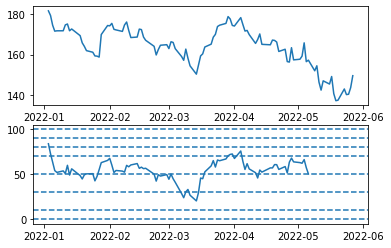

In [44]:
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(df.index, df_aapl['Close'])

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(df_aapl.index, df['rsi'])
ax2.axhline(0, linestyle = '--')
ax2.axhline(10, linestyle = '--')
ax2.axhline(30, linestyle = '--')
ax2.axhline(50, linestyle = '--')
ax2.axhline(70, linestyle = '--')
ax2.axhline(80, linestyle = '--')
ax2.axhline(90, linestyle = '--')
ax2.axhline(100, linestyle = '--')
plt.show

<function matplotlib.pyplot.show>

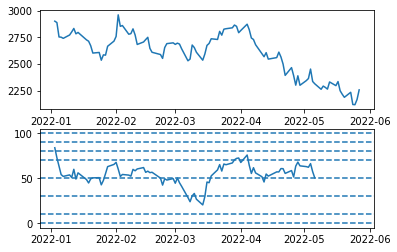

In [45]:
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(df.index, df_goog['Close'])

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(df_goog.index, df['rsi'])
ax2.axhline(0, linestyle = '--')
ax2.axhline(10, linestyle = '--')
ax2.axhline(30, linestyle = '--')
ax2.axhline(50, linestyle = '--')
ax2.axhline(70, linestyle = '--')
ax2.axhline(80, linestyle = '--')
ax2.axhline(90, linestyle = '--')
ax2.axhline(100, linestyle = '--')
plt.show

<function matplotlib.pyplot.show>

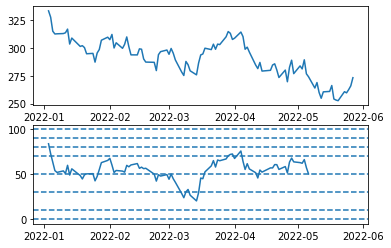

In [46]:
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(df.index, df_msft['Close'])

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(df_msft.index, df['rsi'])
ax2.axhline(0, linestyle = '--')
ax2.axhline(10, linestyle = '--')
ax2.axhline(30, linestyle = '--')
ax2.axhline(50, linestyle = '--')
ax2.axhline(70, linestyle = '--')
ax2.axhline(80, linestyle = '--')
ax2.axhline(90, linestyle = '--')
ax2.axhline(100, linestyle = '--')
plt.show

In [50]:
df_merge = pd.merge(data_aapl, data_goog)
# df_merge = pd.merge(df_merge, df_msft)

In [57]:
pd.merge(data_goog['Close'], data_aapl['Close'], how='inner')



,Close
